# Importando bibliotecas e dados 

In [115]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

%matplotlib inline

In [116]:
diretorio = os.getcwd()
for dirname, _, filenames in os.walk(diretorio):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\isaac\Desktop\isaac\Faculdade\INICIAÇÃO CIENTIFICA\Ferias\Semana 1\Computer Vision studies\digit_recognizer.ipynb
C:\Users\isaac\Desktop\isaac\Faculdade\INICIAÇÃO CIENTIFICA\Ferias\Semana 1\Computer Vision studies\sample_submission.csv
C:\Users\isaac\Desktop\isaac\Faculdade\INICIAÇÃO CIENTIFICA\Ferias\Semana 1\Computer Vision studies\test.csv
C:\Users\isaac\Desktop\isaac\Faculdade\INICIAÇÃO CIENTIFICA\Ferias\Semana 1\Computer Vision studies\train.csv
C:\Users\isaac\Desktop\isaac\Faculdade\INICIAÇÃO CIENTIFICA\Ferias\Semana 1\Computer Vision studies\.ipynb_checkpoints\digit_recognizer-checkpoint.ipynb


In [117]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Visualizações

In [118]:
display(train.head())
print(train.shape)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)


In [119]:
display(test.head())
print(test.shape)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(28000, 784)


# Separando os dados

In [120]:
Y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)

# Normalizando os valores de treino

In [121]:
X_train = X_train / 255.0

In [122]:
#X_train

# Alterando o formato dos dados

In [123]:
# Por que -1?

X_train_2 = X_train.values.reshape(-1, 28, 28,1)

In [124]:
X_train_2.shape

(42000, 28, 28, 1)

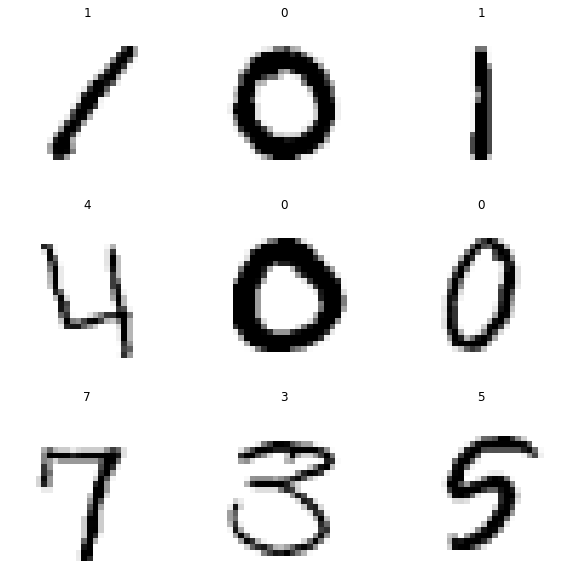

In [125]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_2[i], cmap=plt.cm.binary)
    plt.title(Y_train[i])
    plt.axis("off")
plt.show()

In [126]:
Y_train = to_categorical(Y_train)
Y_train.shape

(42000, 10)

# Separando os dados para treino e teste

In [127]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_2, Y_train, test_size=0.1, random_state=2)

# Criando o modelo

In [128]:
data_augmentation = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, kernel_size=(5,5), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [130]:
learning_schedule = LearningRateScheduler(lambda x: 1e-4 * 0.95 ** x)

In [131]:
#model.summary()

In [132]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [133]:
history = model.fit(data_augmentation.flow(X_train, Y_train, batch_size=64),
                    epochs=50,
                    validation_data=(X_val, Y_val),
                    callbacks = [learning_schedule],
                    steps_per_epoch = X_train.shape[0]/64,
                    verbose=2
                   )

Epoch 1/50
590/590 - 2301s - loss: 0.6728 - accuracy: 0.7884 - val_loss: 0.0837 - val_accuracy: 0.9726 - lr: 1.0000e-04 - 2301s/epoch - 4s/step
Epoch 2/50
590/590 - 1720s - loss: 0.2086 - accuracy: 0.9417 - val_loss: 0.0629 - val_accuracy: 0.9840 - lr: 9.5000e-05 - 1720s/epoch - 3s/step
Epoch 3/50
590/590 - 1615s - loss: 0.1608 - accuracy: 0.9557 - val_loss: 0.0775 - val_accuracy: 0.9800 - lr: 9.0250e-05 - 1615s/epoch - 3s/step
Epoch 4/50
590/590 - 1617s - loss: 0.1349 - accuracy: 0.9625 - val_loss: 0.0443 - val_accuracy: 0.9869 - lr: 8.5737e-05 - 1617s/epoch - 3s/step
Epoch 5/50
590/590 - 1761s - loss: 0.1132 - accuracy: 0.9690 - val_loss: 0.0565 - val_accuracy: 0.9879 - lr: 8.1451e-05 - 1761s/epoch - 3s/step
Epoch 6/50
590/590 - 1931s - loss: 0.0961 - accuracy: 0.9744 - val_loss: 0.0567 - val_accuracy: 0.9895 - lr: 7.7378e-05 - 1931s/epoch - 3s/step
Epoch 7/50
590/590 - 1642s - loss: 0.0877 - accuracy: 0.9756 - val_loss: 0.1123 - val_accuracy: 0.9831 - lr: 7.3509e-05 - 1642s/epoch - 

KeyboardInterrupt: 